# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202006 
## SECTION: Probability theory
### VIDEO: The law of large numbers
#### TEACHER: Mike X Cohen, sincxpress.com

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np

In [2]:
## example with rolling a die

# die probabilities (weighted)
f1 = 2/8
f2 = 2/8
f3 = 1/8
f4 = 1/8
f5 = 1/8
f6 = 1/8

# confirm sum to 1
print('Sum of all probabilities:', f1+f2+f3+f4+f5+f6)

# expected value
expval = 1*f1 + 2*f2 + 3*f3 + 4*f4 + 5*f5 + 6*f6
print('Expected value:', expval)

# generate "population"
population = [1, 1, 2, 2, 3, 4, 5, 6]
for i in range(20):
    population = np.hstack((population, population))

nPop = len(population)
print('Elements in population:', nPop)

# draw sample of 8 rolls
sample = np.random.choice(population, 8)
print('\nExample of random sample from this population:', sample[:8])
print('Mean of random sample:', np.mean(sample))

Sum of all probabilities: 1.0
Expected value: 3.0
Elements in population: 8388608

Example of random sample from this population: [5 1 2 2 2 4 1 6]
Mean of random sample: 2.875


2.9991462123684993
3.123236331569665


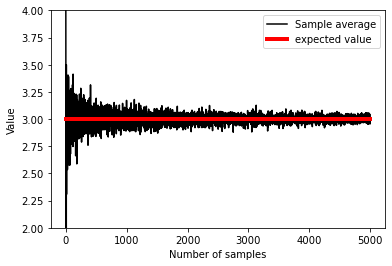

In [10]:
## experiment: draw larger and larger samples
# Mike's version

k = 5000  # maximum number of samples
sampleAve = np.zeros(k)

for i in range(k):
    # Идея тут в следующем:
    # При помощи функции np.random.rand создается i случайных чисел [0, 1)
    # (количество случайных числе по ходу цикла меняется от 1 до k)
    # Далее случайно число (числа, если i>0) умножается на длинну популяции,
    # округляется в меньшую сторону и переделывается в тип данных int
    # Оно используется в качестве индекса массива population
    idx = np.floor(np.random.rand(i+1)*nPop)
    # Здесь происходит расчёт среднего значения подмассива population
    # и сохранение результата
    sampleAve[i] = np.mean(population[idx.astype(int)])
    
    # По-моему, тут Майк перемудрил

plt.plot(sampleAve, 'k')
plt.plot([1, k], [expval, expval], 'r', linewidth=4)
plt.xlabel('Number of samples')
plt.ylabel('Value')
plt.ylim([expval-1, expval+1])
plt.legend(('Sample average', 'expected value'))

# mean of samples converges to population estimate quickly:
print(np.mean(sampleAve))
print(np.mean(sampleAve[:9]))

2.9995709895357248
3.050440917107584


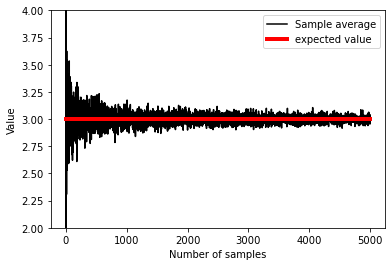

In [8]:
k = 5000  # maximum number of samples
sampleAve = np.zeros(k)

for i in range(k):
    idx = np.random.randint(low=0, high=nPop, size=i+1)
    sampleAve[i] = np.mean(population[idx])

plt.plot(sampleAve, 'k')
plt.plot([0, k-1], [expval, expval], 'r', linewidth=4)
plt.xlabel('Number of samples')
plt.ylabel('Value')
plt.ylim([expval-1, expval+1])
plt.legend(('Sample average', 'expected value'))

# mean of samples converges to population estimate quickly:
print(np.mean(sampleAve))
print(np.mean(sampleAve[:9]))

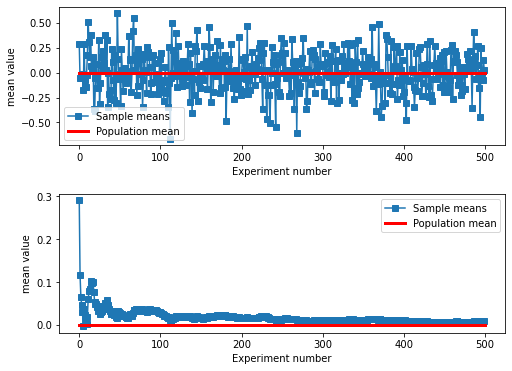

In [25]:
## Another example from a previous lecture (sampleVariability) (slightly adapted)

# generate population data with known mean
populationN = 1000000
population = np.random.randn(populationN)
population = population - np.mean(population)  # demean


# get means of samples
samplesize = 30
numberOfExps = 500
samplemeans = np.zeros(numberOfExps)

for expi in range(numberOfExps):
    # get a sample and compute its mean
    sampleidx = np.random.randint(0, populationN, samplesize)
    samplemeans[expi] = np.mean(population[sampleidx])

# show the results!
fig, ax = plt.subplots(2, 1, figsize=(8, 6))
fig.subplots_adjust(hspace=0.35)
ax[0].plot(samplemeans, 's-')
ax[0].plot([0, numberOfExps], [np.mean(population), np.mean(population)], 'r', linewidth=3)
ax[0].set_xlabel('Experiment number')
ax[0].set_ylabel('mean value')
ax[0].legend(('Sample means','Population mean'))

ax[1].plot(np.cumsum(samplemeans) / np.arange(1, numberOfExps+1), 's-')
ax[1].plot([0, numberOfExps], [np.mean(population), np.mean(population)], 'r', linewidth=3)
ax[1].set_xlabel('Experiment number')
ax[1].set_ylabel('mean value')
ax[1].legend(('Sample means','Population mean'))

plt.show()

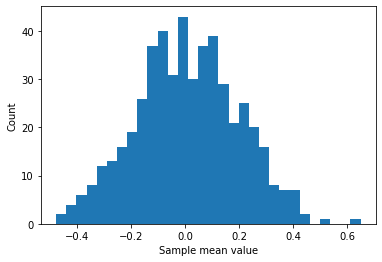

In [5]:
## some foreshadowing...

plt.hist(samplemeans, 30)
plt.xlabel('Sample mean value')
plt.ylabel('Count')
plt.show()